In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import numpy as np
import pandas as pd

In [100]:
plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')    

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

### 1. 버스 정류장 데이터

* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

In [2]:
bus_station = pd.read_csv('../data/1.1 BUS_STATION_BOARDING_MONTH_202204.csv', sep=",", encoding = "cp949")

In [3]:
bus_station.shape

(1169878, 8)

In [4]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [5]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 71.4+ MB


In [6]:
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.169878e+06,1.169878e+06,1.169878e+06,1.169878e+06
mean,2.022042e+07,1.108042e+02,1.082804e+02,2.022043e+07
std,8.661492e+00,1.554787e+02,1.420829e+02,2.667754e+01
min,2.022040e+07,0.000000e+00,0.000000e+00,2.022040e+07
25%,2.022041e+07,1.800000e+01,2.100000e+01,2.022041e+07
50%,2.022042e+07,6.300000e+01,6.800000e+01,2.022042e+07
75%,2.022042e+07,1.460000e+02,1.450000e+02,2.022043e+07
max,2.022043e+07,3.990000e+03,3.615000e+03,2.022050e+07


#### 버스정류장 위치를 구 별로 구분하기

- 버스정류장 ARS 번호의 앞자리 2개로 새로운 컬럼 생성

In [7]:
bus_station['자치구'] = bus_station["버스정류장ARS번호"].str.slice(start=0, stop=2)

In [9]:
# 구 코드를 구 이름으로 변환
bus_station['자치구'] = bus_station['자치구'].map({
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})

In [10]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구


#### 결측치를 처리

- 가상 기점, 가상 종점으로 인한 ~ 제거

In [11]:
bus_station.loc[bus_station['버스정류장ARS번호'] == '~']

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
747,20220401,750B,750B번(은평차고지~서울대),~,은평공영차고지(가상),0,100,20220404,NaN
852,20220401,602,602번(양천공용차고지~시청앞),~,양천공영차고지(기점가상),10,0,20220404,NaN
1048,20220401,2227,2227번(중랑공영차고지~중곡역),~,중랑공영차고지(기점가상),1,0,20220404,NaN
1252,20220401,2311,2311번(중랑차고지~문정동),~,중랑공영차고지(기점가상),7,0,20220404,NaN
1479,20220401,2312,2312번(중랑공영차고지~강동공영차고지),~,중랑공영차고지(기점가상),4,0,20220404,NaN
...,...,...,...,...,...,...,...,...,...
1168831,20220430,1119,1119번(강북청소년수련관난나~녹천역),~,선일교통종점(가상),0,1,20220503,NaN
1169138,20220430,5523,5523번(보성운수기종점~서울대입구역),~,보성운수기종점(가상),2,129,20220503,NaN
1169509,20220430,153,153번(우이동~당곡사거리),~,우이동도선사입구(기점가상),10,2,20220503,NaN
1169612,20220430,2015,2015번(신내공영차고지~동대문운동장),~,중랑공영차고지(기점가상),16,0,20220503,NaN


In [12]:
# NaN값을 제거
bus_station = bus_station.dropna()

In [13]:
# 타입 변경
bus_station = bus_station.astype({"버스정류장ARS번호":'int'})

In [14]:
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),6243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),6242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),6238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),6309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구


#### 구 별 버스정류장의 개수

In [16]:
# 서울의 버스 정류장 데이터만 포함하고 있는 파일 (서울 공공데이터 포털)
only_seoul = pd.read_csv('../data/1.1 bus_station.csv', sep=",", encoding = "UTF-8")

In [17]:
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS-ID  10935 non-null  int64 
 1   정류소명    10935 non-null  object
dtypes: int64(1), object(1)
memory usage: 171.0+ KB


In [19]:
only_seoul.rename(columns={'ARS-ID':'버스정류장ARS번호'}, inplace=True)

In [20]:
only_seoul.head()

,버스정류장ARS번호,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [21]:
df = pd.merge(only_seoul, bus_station, how = 'inner', on = '버스정류장ARS번호')

In [23]:
df.head()

,버스정류장ARS번호,정류소명,사용일자,노선번호,노선명,역명,승차총승객수,하차총승객수,등록일자,자치구
0,1001,종로2가사거리,20220401,N37,N37번(송파공영차고지~진관공영차고지),종로2가사거리,4,9,20220404,종로구
1,1001,종로2가사거리,20220401,N37,N37번(진관공영차고지~송파공영차고지),종로2가사거리,5,6,20220404,종로구
2,1001,종로2가사거리,20220401,741,741번(진관차고지~헌인릉입구),종로2가사거리,206,203,20220404,종로구
3,1001,종로2가사거리,20220401,470,470번(상암차고지~안골마을),종로2가사거리,303,239,20220404,종로구
4,1001,종로2가사거리,20220402,741,741번(진관차고지~헌인릉입구),종로2가사거리,132,159,20220405,종로구


In [24]:
# 구 별 버스 정류장의 개수 확인
seoul_bus_station_ARS = df.groupby(by=["자치구"], as_index=False)["버스정류장ARS번호"].nunique()

In [26]:
seoul_bus_station_ARS

,자치구,버스정류장ARS번호
0,강남구,499
1,강동구,369
2,강북구,413
3,강서구,566
4,관악구,466
5,광진구,269
6,구로구,486
7,금천구,345
8,노원구,514
9,도봉구,359


#### 구 별로 버스 노선이 몇 개가 지나가는지

In [28]:
seoul_bus_station_line = df.groupby(by=["자치구"], as_index=False)["노선번호"].nunique()

In [29]:
seoul_bus_station_line

,자치구,노선번호
0,강남구,91
1,강동구,21
2,강북구,67
3,강서구,49
4,관악구,86
5,광진구,41
6,구로구,79
7,금천구,58
8,노원구,57
9,도봉구,46


#### 각 구별로 승차총승객수, 하차총승객수 확인

In [32]:
seoul_bus_station_sum = df.groupby(by=["자치구"], as_index=False)[["승차총승객수","하차총승객수"]].sum()

In [33]:
seoul_bus_station_sum

,자치구,승차총승객수,하차총승객수
0,강남구,8030483,7569213
1,강동구,2890053,2830506
2,강북구,4825181,4671783
3,강서구,4681083,4652828
4,관악구,7655819,7792476
5,광진구,2749448,2753411
6,구로구,4942197,4730992
7,금천구,3776658,3581930
8,노원구,4353295,4292724
9,도봉구,3304305,3211421


#### 각 구별로 승차 평균 승객수, 하차 평균 승객수

In [34]:
seoul_bus_station_mean = df.groupby(by=["자치구"], as_index=False)[["승차총승객수","하차총승객수"]].mean()
seoul_bus_station_mean.rename(columns={'승차총승객수':'승차평균승객수','하차총승객수':'하차평균승객수'}, inplace=True)

In [35]:
seoul_bus_station_mean

,자치구,승차평균승객수,하차평균승객수
0,강남구,128.767927,121.371512
1,강동구,99.161194,97.118065
2,강북구,133.020373,128.791504
3,강서구,88.119480,87.587591
4,관악구,154.753674,157.516040
5,광진구,118.352546,118.523137
6,구로구,119.235615,114.140076
7,금천구,123.098370,116.751304
8,노원구,88.476211,87.245168
9,도봉구,106.859356,103.855540


#### 데이터 프레임 합치기

In [36]:
a = pd.merge(seoul_bus_station_ARS,seoul_bus_station_line,how='inner', on='자치구')
b = pd.merge(a,seoul_bus_station_sum,how='inner', on='자치구')
seoul_bus_station = pd.merge(b,seoul_bus_station_mean,how='inner', on='자치구')

In [37]:
# 컬럼 이름 바꿔주기
seoul_bus_station.rename(columns={'버스정류장ARS번호':'정류장수','노선번호':'노선수'}, inplace=True)

In [38]:
seoul_bus_station

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [39]:
# csv파일로 저장
seoul_bus_station.to_csv("df_seoul_bus_station.csv", index = False)

### 2. 구 별 유동인구 데이터

- 승차평균승객수: 정류장별, 일별 기준
- 이동유형: H(야간상주지), W(주간상주지), E(기타)

In [42]:
seoul_moving = pd.read_csv('../data/1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding = 'UTF-8')

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [43]:
seoul_moving.shape

(28923054, 10)

In [44]:
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


In [45]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB


In [46]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


#### 결측치 처리

- 인구이동(합)은 이동 인구의 합산이지만 object 타입
- 비식별화를 위해 3명 미만의 경우 * 처리
- 변경 후 데이터 타입을 수치형으로 변경

In [47]:
# 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체
seoul_moving.replace("*", '2', inplace=True)

In [48]:
seoul_moving['이동인구(합)'].value_counts()

2          3842041
3.3         399374
6.05        366830
3.29        289731
3.31        232069
            ...   
2102.69          1
955.81           1
609.23           1
724.5            1
1678.85          1
Name: 이동인구(합), Length: 135812, dtype: int64

In [49]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
seoul_moving = seoul_moving.astype({'이동인구(합)': 'float'})

In [50]:
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.4+ GB


#### 이동유형, 요일, 성별 변수의 value수를 파악

In [52]:
seoul_moving['이동유형'].value_counts()

EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: 이동유형, dtype: int64

In [53]:
seoul_moving['요일'].value_counts()

토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: 요일, dtype: int64

In [54]:
seoul_moving['성별'].value_counts()

M    16355029
F    12568025
Name: 성별, dtype: int64

#### 가장 심야 이동이 많은 요일

In [55]:
seoul_moving_night = seoul_moving[seoul_moving['도착시간']<=5]

In [56]:
seoul_moving_night['요일'].value_counts()

토    501891
금    435296
일    383611
목    377407
수    371376
화    359741
월    338716
Name: 요일, dtype: int64

#### 서울 지역의 데이터만 골라보기

In [57]:
seoul_moving = seoul_moving[(seoul_moving["출발 시군구 코드"] < 20000) & (seoul_moving["도착 시군구 코드"] < 20000)]

In [58]:
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10
920411,202204,토,23,11250,11250,M,80,EH,10,28.36
920412,202204,토,23,11250,11250,M,80,EE,20,37.99
920413,202204,토,23,11250,11250,M,80,HE,10,9.42


#### 유출이 제일 많고 적은 구는?

In [59]:
pd.options.display.float_format = '{:.2f}'.format

In [60]:
seoul_moving.groupby(by=['출발 시군구 코드'], as_index=False)["이동인구(합)"].sum()

,출발 시군구 코드,이동인구(합)
0,11010,19880392.20
1,11020,20314978.28
2,11030,15166857.81
3,11040,18138905.09
4,11050,18692751.33
5,11060,16990881.97
6,11070,14527641.30
7,11080,19576122.15
8,11090,13101069.78
9,11100,11269379.27


#### 유입이 가장 많고 적은 구

In [61]:
seoul_moving.groupby(by=['도착 시군구 코드'], as_index=False)["이동인구(합)"].sum()

,도착 시군구 코드,이동인구(합)
0,11010,19827553.13
1,11020,20293021.43
2,11030,15264795.74
3,11040,18093714.50
4,11050,18732568.44
5,11060,17005424.97
6,11070,14536423.71
7,11080,19542758.96
8,11090,13096395.71
9,11100,11260109.02


#### 낮 시간만 보기 (심야버스 제외)

- 도착시간 0부터 4까지 제거

In [62]:
index = seoul_moving[seoul_moving['도착시간'] <=4].index
seoul_moving.drop(index, inplace=True)
seoul_moving.reset_index(drop=True, inplace=True)

In [63]:
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,5,11110,11080,F,65,EW,10,4.68
1,202204,일,5,11110,11080,F,65,WH,10,9.44
2,202204,일,5,11110,11080,F,70,HW,10,5.69
3,202204,일,5,11110,11080,F,70,HE,10,5.68
4,202204,일,5,11110,11080,F,70,EH,20,5.73
...,...,...,...,...,...,...,...,...,...,...
5489130,202204,토,23,11250,11250,M,80,WH,10,85.10
5489131,202204,토,23,11250,11250,M,80,EH,10,28.36
5489132,202204,토,23,11250,11250,M,80,EE,20,37.99
5489133,202204,토,23,11250,11250,M,80,HE,10,9.42


#### '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합

In [64]:
df_mean = seoul_moving.groupby(by=['도착 시군구 코드'], as_index=False)[['평균 이동 시간(분)','이동인구(합)']].mean()
df_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,21.87,46.07
1,11020,21.52,46.24
2,11030,21.82,38.44
3,11040,22.15,44.75
4,11050,22.81,50.08
5,11060,22.15,41.07
6,11070,23.89,43.68
7,11080,22.72,48.97
8,11090,24.36,42.26
9,11100,25.14,40.24


In [65]:
df_sum = seoul_moving.groupby(by=['도착 시군구 코드'], as_index=False)[['평균 이동 시간(분)','이동인구(합)']].sum()
df_sum.rename(columns={'평균 이동 시간(분)':'총 이동 시간','이동인구(합)':'총 이동인구'},inplace=True)
df_sum

,도착 시군구 코드,총 이동 시간,총 이동인구
0,11010,5471640,11528599.19
1,11020,5368440,11533349.41
2,11030,4959790,8738356.25
3,11040,5139830,10383741.91
4,11050,5020720,11022136.66
5,11060,5132710,9517475.46
6,11070,4635870,8477045.57
7,11080,5232500,11278789.10
8,11090,4458260,7735467.90
9,11100,4086140,6540855.44


In [66]:
df_seoul_moving = pd.merge(df_mean,df_sum,how='inner', on='도착 시군구 코드')

In [67]:
df_seoul_moving

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,21.87,46.07,5471640,11528599.19
1,11020,21.52,46.24,5368440,11533349.41
2,11030,21.82,38.44,4959790,8738356.25
3,11040,22.15,44.75,5139830,10383741.91
4,11050,22.81,50.08,5020720,11022136.66
5,11060,22.15,41.07,5132710,9517475.46
6,11070,23.89,43.68,4635870,8477045.57
7,11080,22.72,48.97,5232500,11278789.10
8,11090,24.36,42.26,4458260,7735467.90
9,11100,25.14,40.24,4086140,6540855.44


In [68]:
# 자치구
array =['종로구', '중구', '용산구', '성동구', '광진구', 
        '동대문구', '중랑구', '성북구', '강북구', '도봉구', 
        '노원구', '은평구', '서대문구', '마포구', '양천구', 
        '강서구', '구로구', '금천구', '영등포구', '동작구',
        '관악구', '서초구', '강남구', '송파구', '강동구']

In [69]:
df_seoul_moving['자치구'] = array

In [72]:
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,자치구
0,11010,21.87,46.07,5471640,11528599.19,종로구
1,11020,21.52,46.24,5368440,11533349.41,중구
2,11030,21.82,38.44,4959790,8738356.25,용산구
3,11040,22.15,44.75,5139830,10383741.91,성동구
4,11050,22.81,50.08,5020720,11022136.66,광진구


In [73]:
# csv파일로 저장
df_seoul_moving.to_csv("df_seoul_moving.csv", index = False)

## 저장한 두 데이터 불러오기

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import numpy as np
import pandas as pd

In [2]:
plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')    

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",")

In [5]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",")

In [6]:
seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.77,121.37
1,강동구,369,21,2890053,2830506,99.16,97.12
2,강북구,413,67,4825181,4671783,133.02,128.79
3,강서구,566,49,4681083,4652828,88.12,87.59
4,관악구,466,86,7655819,7792476,154.75,157.52


In [7]:
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,자치구
0,11010,21.87,46.07,5471640,11528599.19,종로구
1,11020,21.52,46.24,5368440,11533349.41,중구
2,11030,21.82,38.44,4959790,8738356.25,용산구
3,11040,22.15,44.75,5139830,10383741.91,성동구
4,11050,22.81,50.08,5020720,11022136.66,광진구


## 두 데이터 프레임 병합

In [8]:
df = pd.merge(seoul_bus_station, df_seoul_moving, how = 'inner', on = '자치구')

In [9]:
df.head(2)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,499,91,8030483,7569213,128.77,121.37,11230,23.42,104.46,6543820,29188819.52
1,강동구,369,21,2890053,2830506,99.16,97.12,11250,25.93,73.49,5082380,14404079.28


In [10]:
# 자치구를 인덱스로
df = df.set_index(keys=['자치구'], inplace=False, drop=True)

In [11]:
# 도착 시군구 코드 drop
df = df.drop(columns = ['도착 시군구 코드']) 

## 데이터 분석

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   정류장수         25 non-null     int64  
 1   노선수          25 non-null     int64  
 2   승차총승객수       25 non-null     int64  
 3   하차총승객수       25 non-null     int64  
 4   승차평균승객수      25 non-null     float64
 5   하차평균승객수      25 non-null     float64
 6   평균 이동 시간(분)  25 non-null     float64
 7   이동인구(합)      25 non-null     float64
 8   총 이동 시간      25 non-null     int64  
 9   총 이동인구       25 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 2.1+ KB


In [13]:
df.describe()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
count,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00
mean,424.60,72.92,4912037.28,4800700.60,115.72,113.03,23.38,54.41,5112083.60,12214073.99
std,106.28,23.81,1421263.42,1400537.52,17.08,16.87,1.36,17.06,615711.34,5189990.42
min,178.00,21.00,2749448.00,2746738.00,87.40,86.21,21.52,32.87,3789660.00,5129426.08
25%,349.00,56.00,3792541.00,3740923.00,103.91,101.24,22.15,44.75,4748160.00,9289534.65
50%,435.00,71.00,4942197.00,4730992.00,119.24,115.32,23.16,48.97,5132710.00,11022136.66
75%,499.00,94.00,5641742.00,5603488.00,126.69,122.42,24.36,60.55,5471640.00,14016047.01
max,602.00,107.00,8030483.00,7792476.00,154.75,157.52,25.93,104.46,6543820.00,29188819.52


In [14]:
df.head()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
자치구,,,,,,,,,,
강남구,499,91,8030483,7569213,128.77,121.37,23.42,104.46,6543820,29188819.52
강동구,369,21,2890053,2830506,99.16,97.12,25.93,73.49,5082380,14404079.28
강북구,413,67,4825181,4671783,133.02,128.79,24.36,42.26,4458260,7735467.90
강서구,566,49,4681083,4652828,88.12,87.59,25.52,65.19,5486630,14016047.01
관악구,466,86,7655819,7792476,154.75,157.52,23.48,53.06,5150450,11638671.68


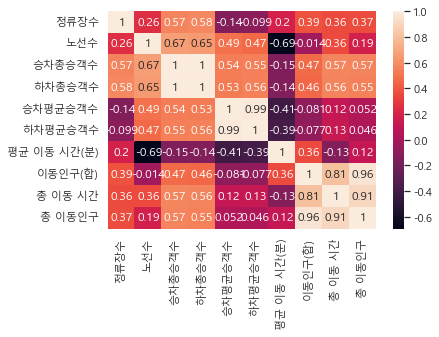

In [15]:
# Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

- 정류장수 <- 하차총승객수, 승차총승객수
- 노선수 <- 평균이동시간(분), 승차총승객수, 하차총승객수

## Feature Engineering

- 피처들 간 독립을 가정해야 다중 공선성 문제를 피할 수 있음.
     - 회귀분석에서 feature들 간 강한 상관관계가 나타나는 문제.
     - 회귀분석의 대전제는 feature들 간의 독립.
     
     
- 상관관계가 1에 가까운 변수 중 하나는 삭제하는 것이 옳지 않을까?
- 삭제하지 않는다면 두 변수를 모두 고려한 새로운 feature를 생성
    - 둘 중 target과 상관관계가 더 낮은 feature를 삭제.

### 삭제하는 경우

#### target을 정류장 수로 가정하고 해보기

In [16]:
df.head()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
자치구,,,,,,,,,,
강남구,499,91,8030483,7569213,128.77,121.37,23.42,104.46,6543820,29188819.52
강동구,369,21,2890053,2830506,99.16,97.12,25.93,73.49,5082380,14404079.28
강북구,413,67,4825181,4671783,133.02,128.79,24.36,42.26,4458260,7735467.90
강서구,566,49,4681083,4652828,88.12,87.59,25.52,65.19,5486630,14016047.01
관악구,466,86,7655819,7792476,154.75,157.52,23.48,53.06,5150450,11638671.68


In [17]:
# 승차총승객수와 하차총승객수의 상관관계가 1인 이유는?
## 정류장 수와 상관관계가 더 낮은 승차총승객수를 제거
df_drop1 = df.drop(columns = ['승차총승객수']) 

In [18]:
# 승차평균승객수와 하차평균승객수의 상관관계 역시 0.99
## 정류장 수와 상관관계가 더 낮은 하차평균승객수를 제거
df_drop1 = df_drop1.drop(columns = ['하차평균승객수']) 

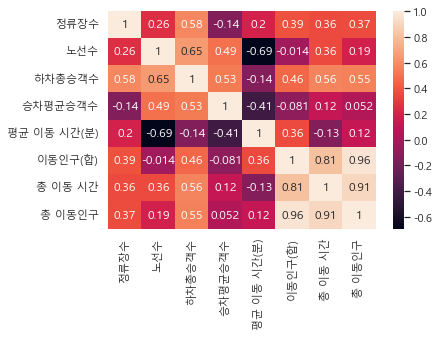

In [19]:
sns.heatmap(df_drop1.corr(), annot = True)
plt.show()

### 새로운 변수를 생성하는 경우

- 승차총승객수 - 하차총승객수
- 승차평균승객수 - 하차평균승객수


- 생성 후 두 변수를 모두 제거

In [20]:
df.head()

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
자치구,,,,,,,,,,
강남구,499,91,8030483,7569213,128.77,121.37,23.42,104.46,6543820,29188819.52
강동구,369,21,2890053,2830506,99.16,97.12,25.93,73.49,5082380,14404079.28
강북구,413,67,4825181,4671783,133.02,128.79,24.36,42.26,4458260,7735467.90
강서구,566,49,4681083,4652828,88.12,87.59,25.52,65.19,5486630,14016047.01
관악구,466,86,7655819,7792476,154.75,157.52,23.48,53.06,5150450,11638671.68


In [21]:
# 1. 총 승객수
df['승하차총승객수(차)'] = df['승차총승객수'] - df['하차총승객수']

In [22]:
# 2. 평균 승객수
df['승하차평균승객수(차)'] = df['승차평균승객수'] - df['하차평균승객수']

In [23]:
df_drop2 = df.drop(columns = ['승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수'])

In [24]:
df_drop2.head()

,정류장수,노선수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,승하차총승객수(차),승하차평균승객수(차)
자치구,,,,,,,,
강남구,499,91,23.42,104.46,6543820,29188819.52,461270,7.40
강동구,369,21,25.93,73.49,5082380,14404079.28,59547,2.04
강북구,413,67,24.36,42.26,4458260,7735467.90,153398,4.23
강서구,566,49,25.52,65.19,5486630,14016047.01,28255,0.53
관악구,466,86,23.48,53.06,5150450,11638671.68,-136657,-2.76


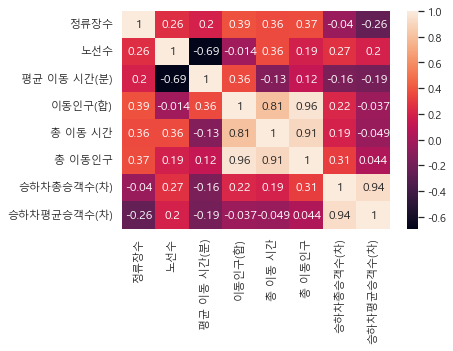

In [25]:
sns.heatmap(df_drop2.corr(), annot = True)
plt.show()

- 새로운 변수를 도출한 후 타겟과의 상관관계를 분석한 결과
    - 두 개의 타겟으로 볼 수 있는 정류장수와 노선수와 비교
    - 총승객수 /// 평균 승객수
        - 정류장수 target
            - 기존) 0.57, 0.58 /// -0.14, 0.09
            - 새로운 변수) -0.04 /// -0.26
            - 결론: **정류장수가 target일 경우 평균 승객수(차)를 만들어 낸 것은 용이.**
                - 총승객수의 경우 기존 변수를 이용하자.
        - 노선수 target
            - 기존) 0.67, 0.65 /// 0.49, 0.47
            - 새로운 변수) 0.27 /// 0.2
            - 결론: 노선수가 target일 경우 새로운 변수보다 기존 변수를 이용하자.

## 솔루션 도출

- 정류장수를 target으로 가정
- 현재 정류장수와 가장 상관관계가 높은 변수는 이동인구(합), 총 이동시간, 총 이동인구
    - 변수의 지표가 가장 낮은 구에 정류장을 증설해야한다.

In [26]:
df_drop2.head()

,정류장수,노선수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,승하차총승객수(차),승하차평균승객수(차)
자치구,,,,,,,,
강남구,499,91,23.42,104.46,6543820,29188819.52,461270,7.40
강동구,369,21,25.93,73.49,5082380,14404079.28,59547,2.04
강북구,413,67,24.36,42.26,4458260,7735467.90,153398,4.23
강서구,566,49,25.52,65.19,5486630,14016047.01,28255,0.53
관악구,466,86,23.48,53.06,5150450,11638671.68,-136657,-2.76


In [27]:
# 이동인구(합) > 금천구
df_drop2['이동인구(합)']

자치구
강남구    104.46
강동구     73.49
강북구     42.26
강서구     65.19
관악구     53.06
광진구     50.08
구로구     45.04
금천구     32.87
노원구     59.06
도봉구     40.24
동대문구    41.07
동작구     45.15
마포구     60.55
서대문구    46.17
서초구     72.54
성동구     44.75
성북구     48.97
송파구     94.97
양천구     49.18
영등포구    61.76
용산구     38.44
은평구     55.06
종로구     46.07
중구      46.24
중랑구     43.68
Name: 이동인구(합), dtype: float64

In [28]:
# 총 이동 시간 > 금천구
df_drop2['총 이동 시간']

자치구
강남구     6543820
강동구     5082380
강북구     4458260
강서구     5486630
관악구     5150450
광진구     5020720
구로구     4717560
금천구     3789660
노원구     5235480
도봉구     4086140
동대문구    5132710
동작구     4944030
마포구     5557360
서대문구    4952990
서초구     5944440
성동구     5139830
성북구     5232500
송파구     6234190
양천구     4383860
영등포구    5525180
용산구     4959790
은평구     4748160
종로구     5471640
중구      5368440
중랑구     4635870
Name: 총 이동 시간, dtype: int64

In [29]:
# 총 이동인구 > 금천구
df_drop2['총 이동인구']

자치구
강남구    29188819.52
강동구    14404079.28
강북구     7735467.90
강서구    14016047.01
관악구    11638671.68
광진구    11022136.66
구로구     9174396.80
금천구     5129426.08
노원구    12538744.48
도봉구     6540855.44
동대문구    9517475.46
동작구    10119602.87
마포구    15083231.22
서대문구   10203725.49
서초구    18651195.64
성동구    10383741.91
성북구    11278789.10
송파구    23004946.79
양천구     9289534.65
영등포구   15693027.00
용산구     8738356.25
은평구    10460584.26
종로구    11528599.19
중구     11533349.41
중랑구     8477045.57
Name: 총 이동인구, dtype: float64

In [30]:
# 정류장 수와 승하차평균승객수는 음의 상관관계
# 강남구, 구로구, 금천구, 종로구, 중구의 정류장 수 확충이 필요.
df_drop2['승하차평균승객수(차)']

자치구
강남구     7.40
강동구     2.04
강북구     4.23
강서구     0.53
관악구    -2.76
광진구    -0.17
구로구     5.10
금천구     6.35
노원구     1.23
도봉구     3.00
동대문구    3.15
동작구     4.72
마포구     2.67
서대문구    1.25
서초구     4.27
성동구     2.08
성북구     0.10
송파구     0.77
양천구     3.85
영등포구   -0.91
용산구     3.41
은평구     1.62
종로구     6.36
중구      5.70
중랑구     1.19
Name: 승하차평균승객수(차), dtype: float64

#### 정류장 수 & 이동인구 (합), 총 이동시간, 총 이동인구의 상관관계?